In [ ]:
print("Hello again!")
print("Welcome to my \"part 2\" of my ML guide.")
print("I am expanding upon the first one, partially in my own curiosity,\nbut also in effort to share with others.")
print("I am using a python notebook because we will eventually, maybe, code.\nBut until then, it's all gonna be standard text.")
print("Lets go:")

Hello again!
Welcome to my "part 2" of my ML guide.
I am expanding upon the first one, partially in my own curiosity,
but also in effort to share with others.
I am using a python notebook because we will eventually, maybe, code.
But until then, it's all gonna be standard text.
Lets go:


Ok, so we left off with a "from scratch" implementation of recognizing the MNIST data set. Now, I want to go a bit deeper and eventually get into LLMs, since there's a lot of research on those going on at this time.

If you haven't seen the first notebook, it's here: https://colab.research.google.com/drive/1i9DzlsYJ16zB0vEIqfAsdi32sf_hsd-U?usp=sharing

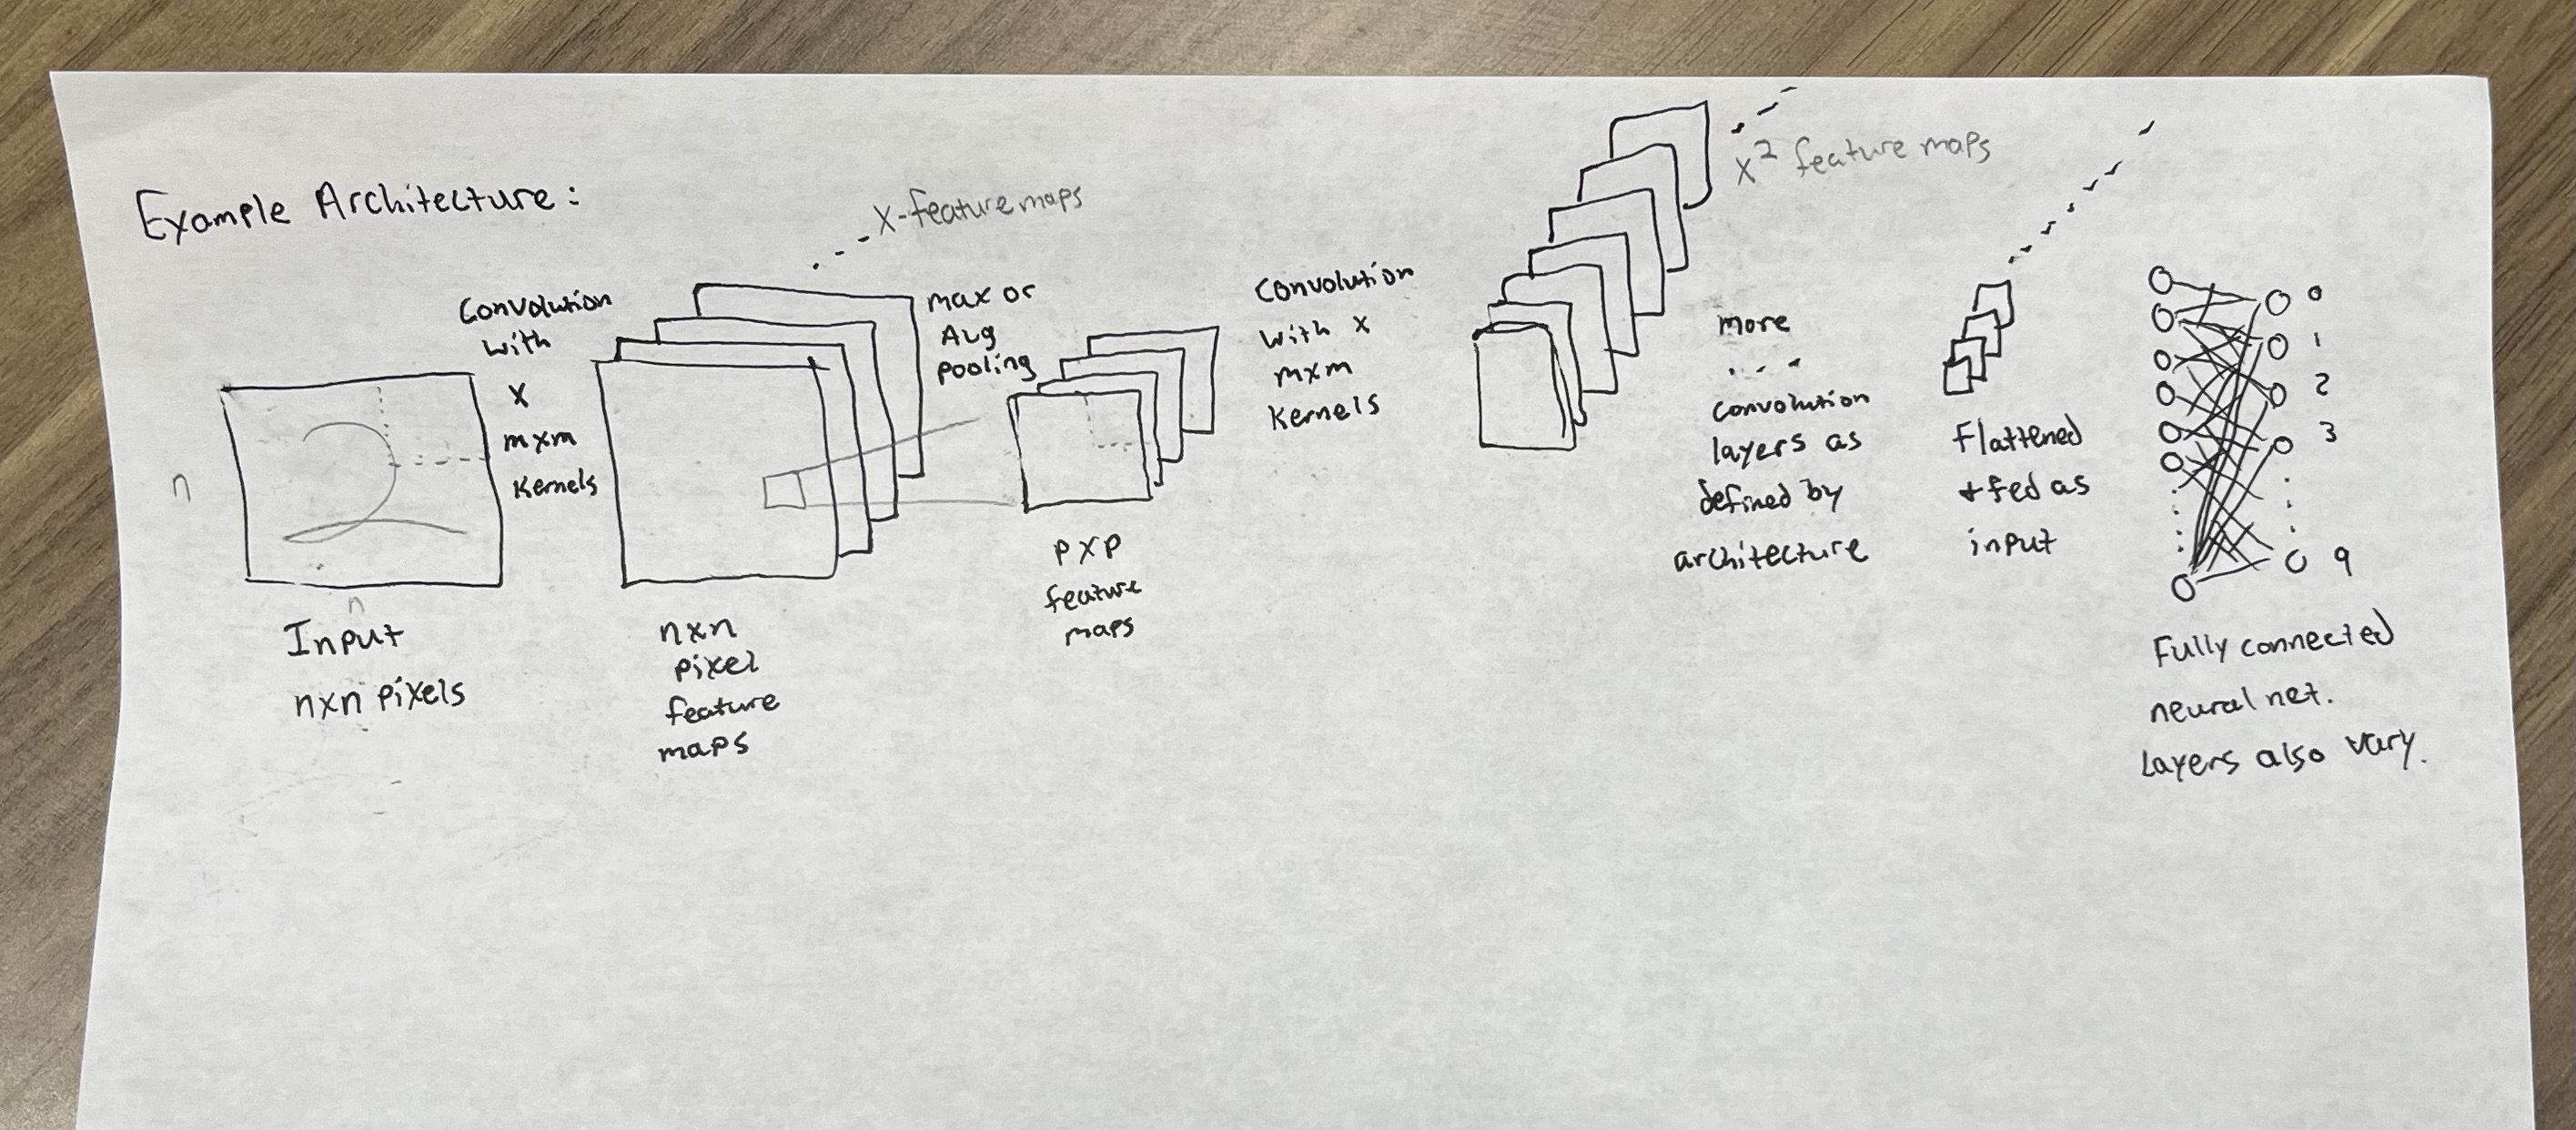

# Convolutional Neural Networks (CNNs)

CNNs are pretty interesting. Let's back up for a second and give a recap or overview of how data can be stored in computers.

In the handwritten digit example, we have a matrix which is m\*n in dimensions, corresponding to the pixels of the m\*n image. Each value in the matrix is a number corresponding to the brightness of a pixel. This matrix was technically just broken down into individual pixels and each one fed into a neuron on the input layer of our neural network. That's totally fine, and works easily enough, but let's consider a step further: colored images.

With colors in images, although there's many ways to represent them, a common choice is RGB. Each pixel has three values; one for red, one for green, one for blue. Typically, each value gets 8 binary bits of range, so it can go from 0 to 255 (in base 10), which is enough to show a wide range of colors. For example, a pixel that is solid green would have the values (0,255,0). Solid white would be (255,255,255), and solid black would be (0,0,0). I encourage those unfamiliar with RGB to google "RGB color picker" and drag the slider around the colors and see how the values change.

This means our input matrix is actually now 3 matricies stacked on top of each other, one is m*n pixels for red values, one for green values, one for blue. A 3-D matrix sort of thing. Formally, these are called **Tensors**.

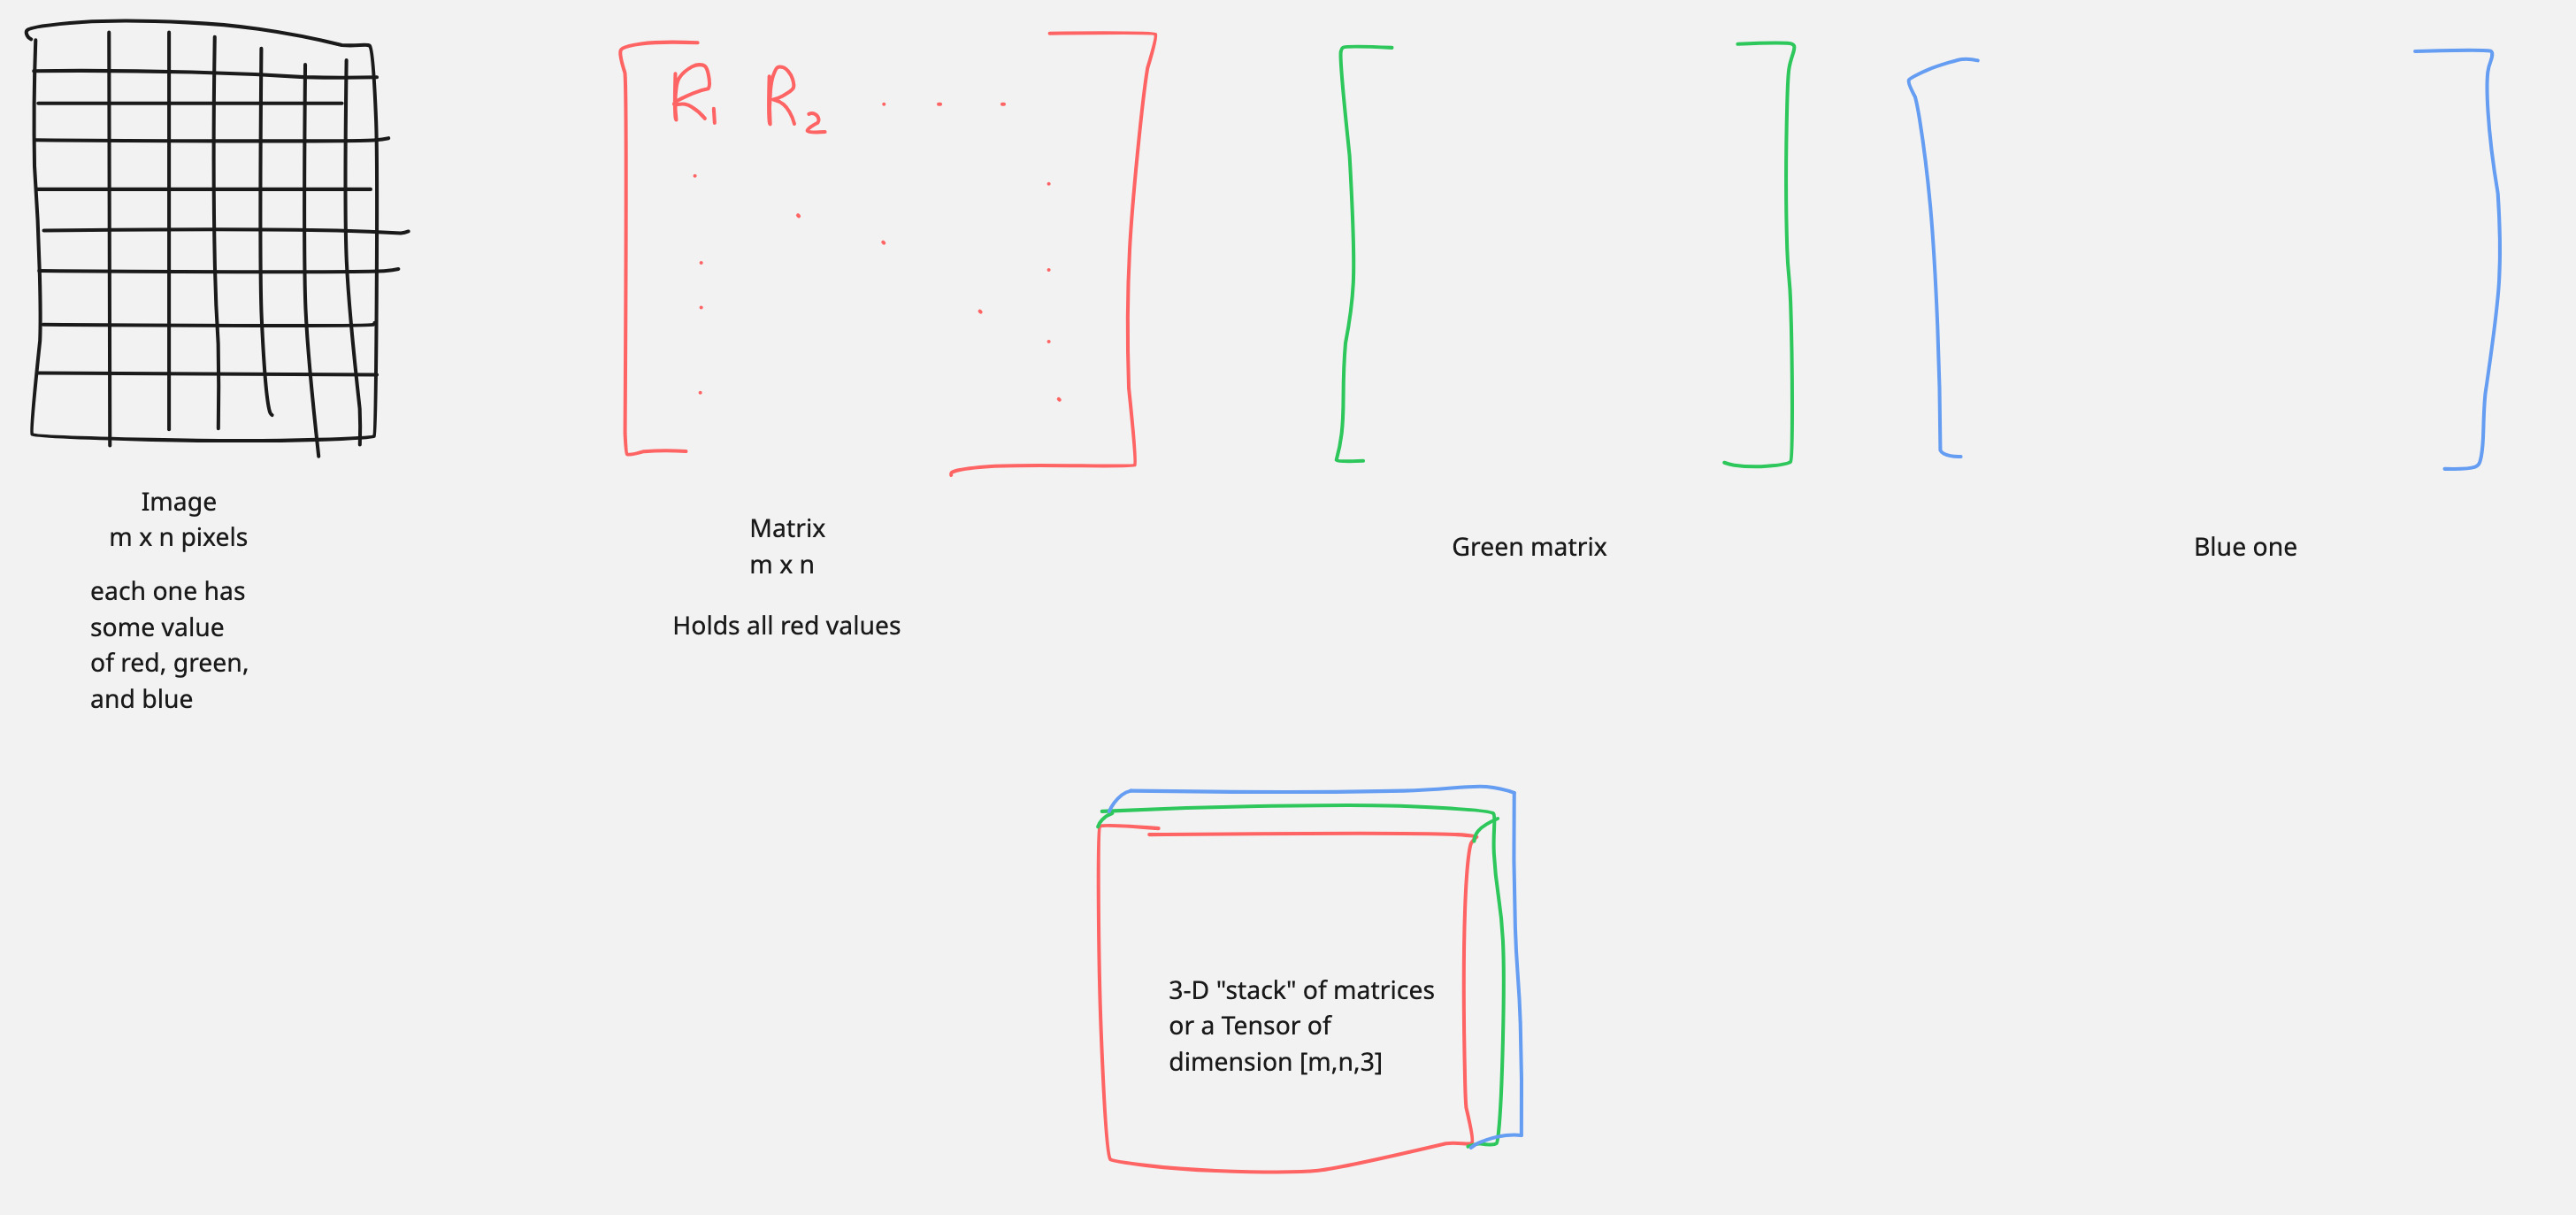

This doesn't have to apply to images only, we can represent all sorts of data with matrix stacks, e.g. sound over a time frame, pictures over a time frame, text, etc. But for this exploration, we will stay on images made of RGB pixels for now. Let's divert to convolution for a second.

I will *not* explain convolution in detail here, see [this video](https://www.youtube.com/watch?v=KuXjwB4LzSA) for nice animations over the basics. Then, you must watch [this video](https://www.youtube.com/watch?v=pj9-rr1wDhM), and we will pick up these notes from where it leaves off.

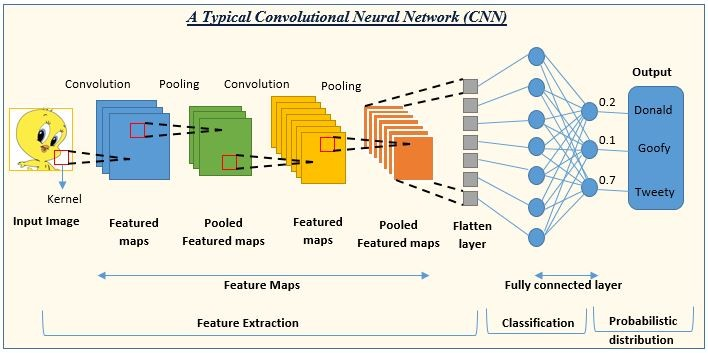

For fun, here's a cool demo of convolution on images:

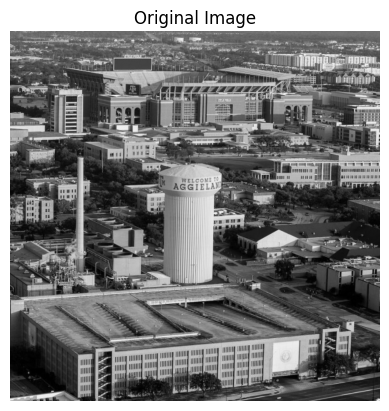

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = Image.open("campus.jpg").convert("L")  # grayscale for simplicity. For RGB, we would need 3 times these matricies.
img_arr = np.array(img)

plt.imshow(img_arr, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()


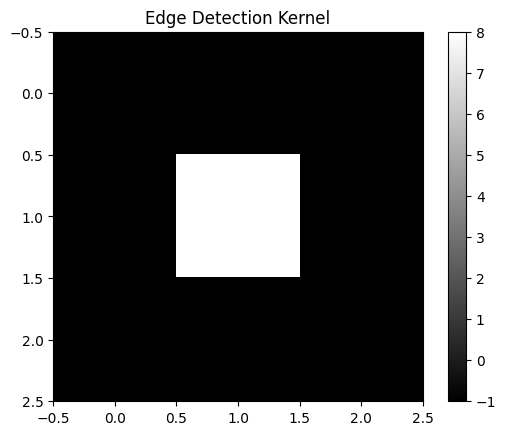

Edge Detection Kernel:
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [ ]:
import numpy as np

# Example: edge detection kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

plt.imshow(kernel, cmap="gray")
plt.title("Edge Detection Kernel")
plt.colorbar()
plt.show()

print("Edge Detection Kernel:\n", kernel)


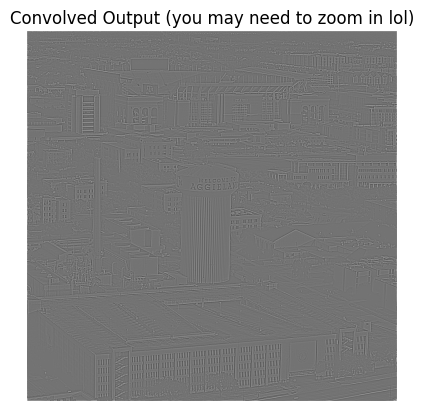

In [ ]:
from scipy.signal import convolve2d

# Apply convolution
output = convolve2d(img_arr, kernel, mode="same", boundary="fill", fillvalue=0)

plt.imshow(output, cmap="gray")
plt.title("Convolved Output (you may need to zoom in lol)")
plt.axis("off")
plt.show()

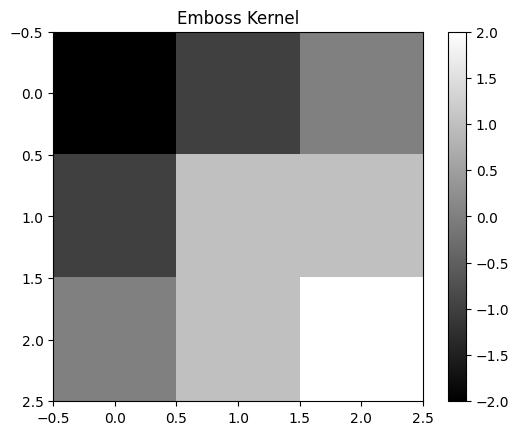

Emboss Kernel:
 [[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


In [ ]:
kernel = np.array([
    [-2, -1, 0],
    [-1,  1, 1],
    [ 0,  1, 2]
])

plt.imshow(kernel, cmap="gray")
plt.title("Emboss Kernel")
plt.colorbar()
plt.show()

print("Emboss Kernel:\n", kernel)

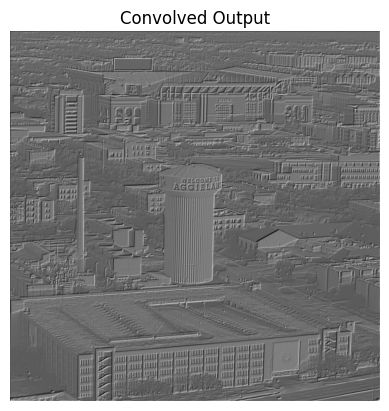

In [ ]:
# Apply convolution
output = convolve2d(img_arr, kernel, mode="same", boundary="fill", fillvalue=0)

plt.imshow(output, cmap="gray")
plt.title("Convolved Output")
plt.axis("off")
plt.show()

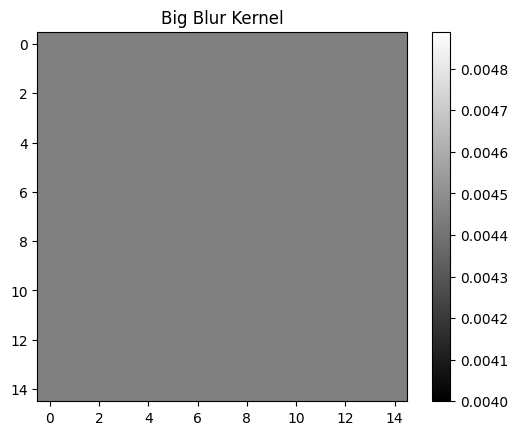

Big Blur Kernel


In [ ]:
# 15x15 box blur kernel
size = 15
kernel = np.ones((size, size)) / (size*size)

plt.imshow(kernel, cmap="gray")
plt.title("Big Blur Kernel")
plt.colorbar()
plt.show()

print("Big Blur Kernel")

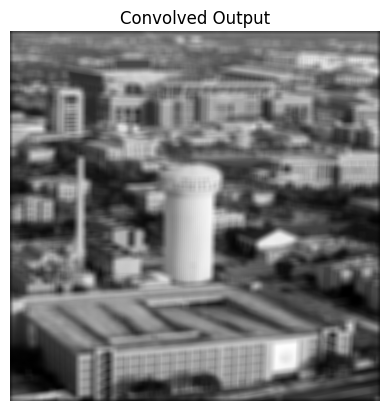

In [ ]:
# Apply convolution
output = convolve2d(img_arr, kernel, mode="same", boundary="fill", fillvalue=0)

plt.imshow(output, cmap="gray")
plt.title("Convolved Output")
plt.axis("off")
plt.show()

There's a couple examples, and the fun really happens when you chain them, using a different kernel on the output of another convolution. Anyway, let's move on now that we have a decent grasp on convolutions / kernels.

CNNs were pioneered by many researchers, Yann LeCun et al. being early influences on practical use of these (see their very famous paper: "Gradient Based Learning Applied to Document Recognition"). The idea of a CNN is to focus more on the *patterns* of the input, rather than just what the input is. In our example on MNIST handwriting data in the previous notebook, we just plopped our flattened image into the neural network, pixel by pixel, and updated weights and biases all based on that big input. With CNNs however, the focus is on training the kernels, and thus training the network to recognize patterns as a whole. This makes CNNs much more powerful than our classic neural networks.

The videos I provided are great, but they lack a walk through of a CNN, so let's do that.

First, we convolve the input image with some number of kernels. This depends on the architecture of the network, which we will discuss later. For this example, say we have 32 different kernels that are 3x3 pixels each, sweeping across our input image to generate 32 different outputs we call *feature maps*.

Second, we perform *pooling* or sub-sampling to reduce the size of our 32 feature maps. For this example we will do *average pooling* This is done by dividing the images up into non overlapping regions, then taking the average of the pixel values in that region. There's other ways to pool as well, like *max pooling*, as shown:



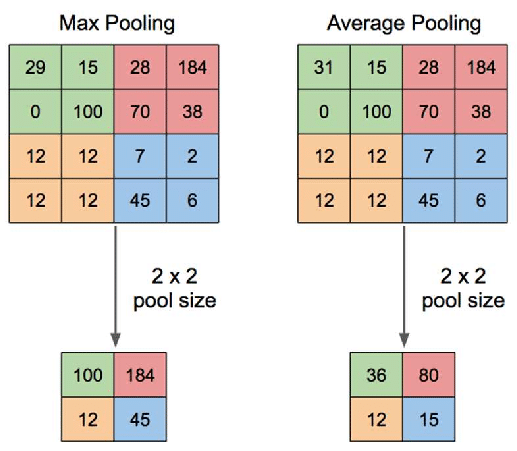

This pooling step allows less computation while preserving the fundamental pattern within the image.

The subsequent steps depend on network architecture, and basically repeat this convolution with the 32 kerenels, sub-sample with pooling, and repeat until the feature maps are small but still have enough data in them to learn from.

After several conv/pool layers, the spatial information is highly compressed. This is flattened into a 1D vector and fed through fully connected layers; the standard neural network we covered in part 1.
The final layer has 10 neurons (one per digit 0-9) with some activation function like sigmoid, softmax, or ReLu, which converts outputs to probabilities that sum to 1.

After this forward pass is completed, we calculate the loss and train the network via backpropagation, over many many images. I am very underqualified to discuss backpropagation, but here's a great [youtube video](https://www.youtube.com/watch?v=z9hJzduHToc) that animates it and shows the formulas.

For me personally, backpropagation is very cool math, and I am simply standing on the shoulders of those who developed it in the past, not diving too deep into the "why" but just being familiar with the "how". Many modern ML libraries like pytorch will just do this for you, but I find those too much of a "black box" and hard to debug, so understanding the math behind what we're trying to do is really useful for debugging in practical programs.

So from here we see that, thanks to the chain rule, there's some simple math that allows this to work and the network can be trained over many many different iterations and eventually it can learn and perform insanely better on problems involving grid-like data like images.

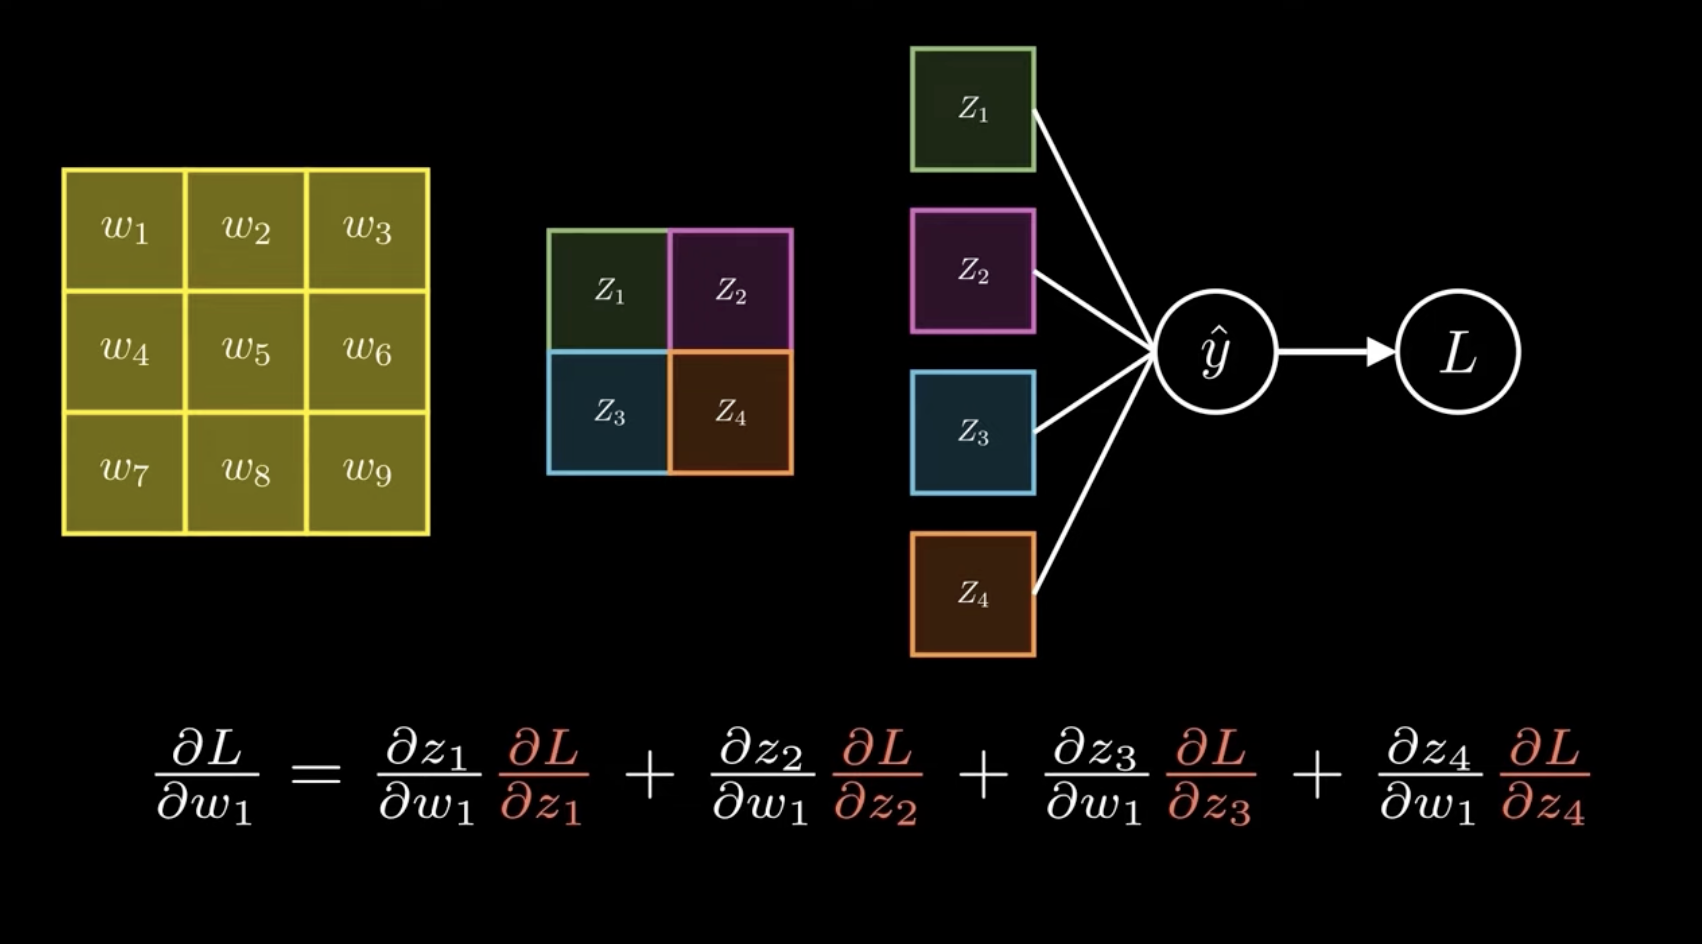

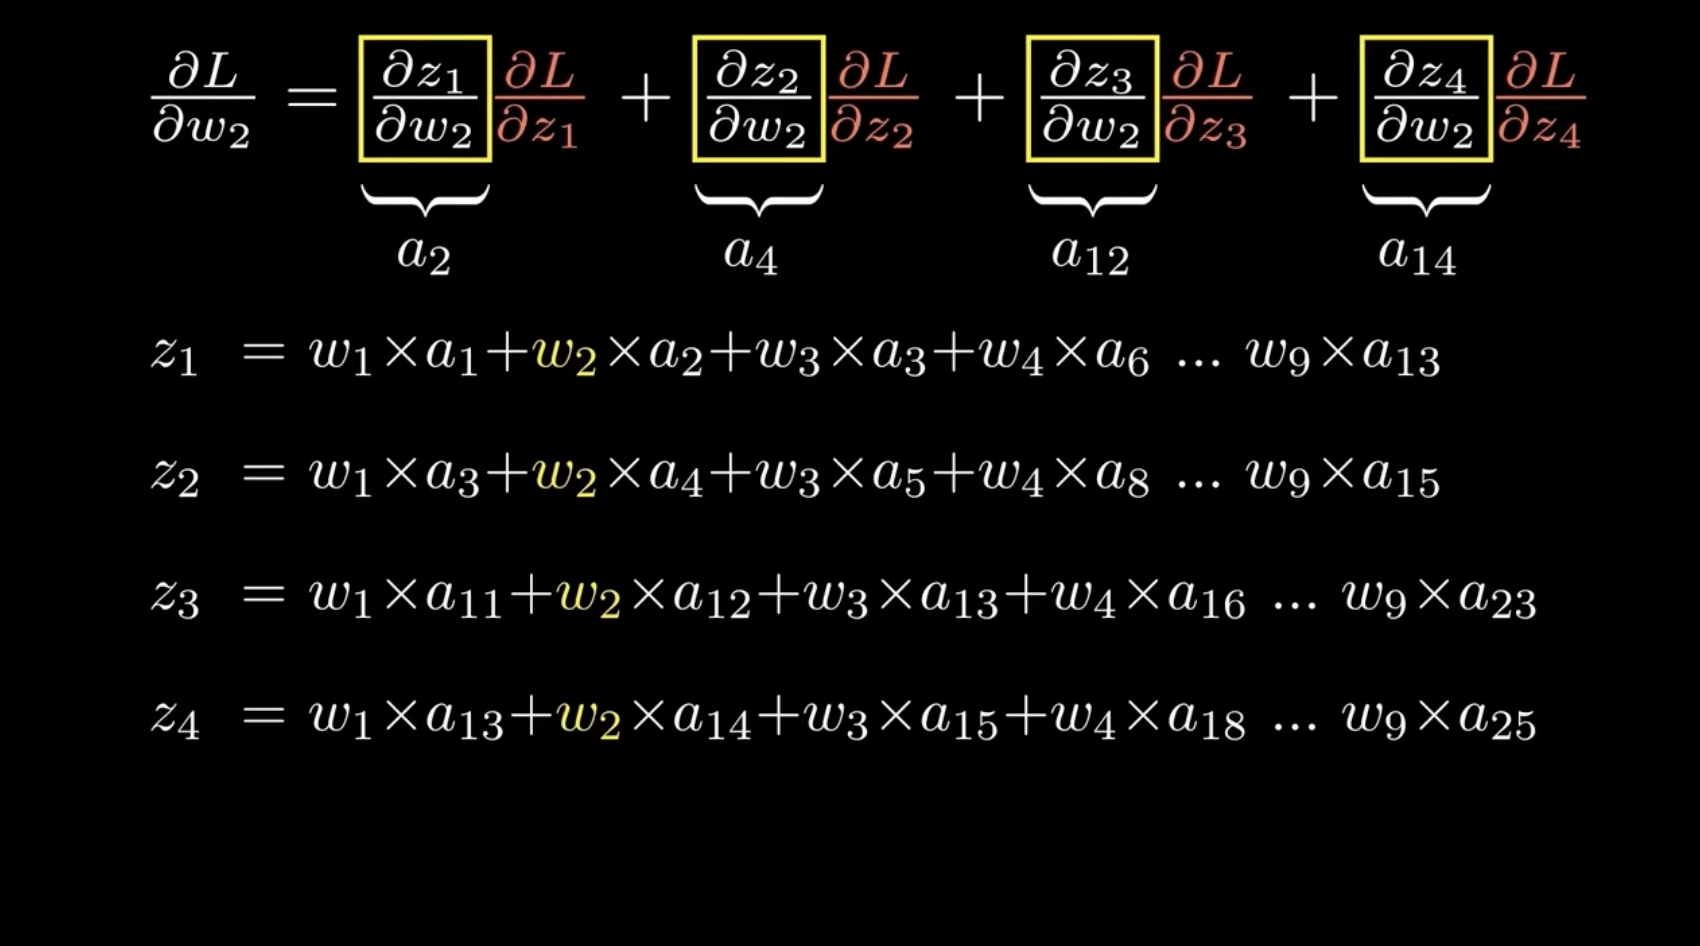

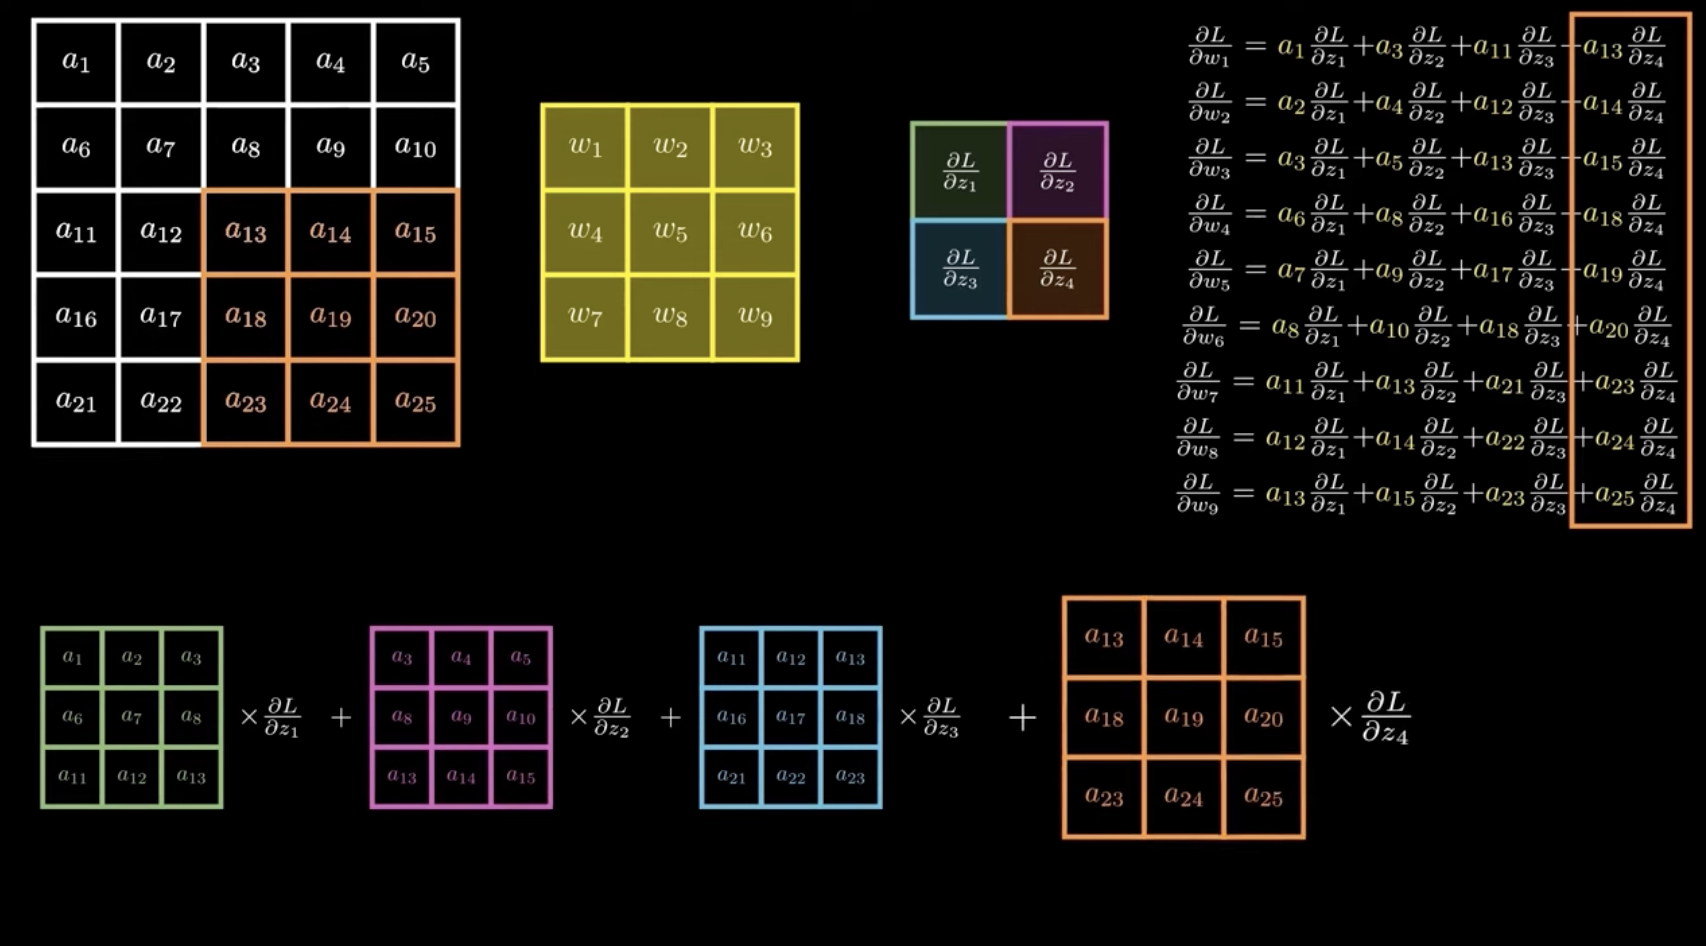

-------------------

As far as the architecture goes there are a lot of variables that can be manipulated, like the size of the kernel, or the number of hidden layers, the type of pooling that's done (if any pooling at all), etc.

This is highly experimental and you just have to kind of look up resources on what other people may have done for a similar problem or just trial and error until you get the results that you want. Often times starting simple and moving more complicated until you get the results you want is how a lot of people do this.

There's also choices to make when it comes to other color channels. The examples I provided above are only in black-and-white, so so the image itself is just basically brightness values of the pixels. Real images are typically red green and blue at the minimum sometimes they have more meta-data such as brightness transparency things like that. All of these are separate layers that are kind of stacked on top of each other in this tensor type of data structure, and it adds extra computation because they're all affecting each other so you have to run them all side-by-side. Sometimes networks will just sum the red green and blue values or other times it will use them as separate images and add them into the feedforward fully network at the final step of the CNN. Again this is something that can be experimented with.

--------------------

Another topic I'll mention is the fact that sometimes we don't actually know what these networks are learning. In one of my machine learning classes the professor mentioned that one was trained on pictures of wolves and huskies to learn the difference between the two, and researchers found that the network did not learn any of the features that define the dog but instead it learned features of snow since every image had snow in the background so it latched onto that.

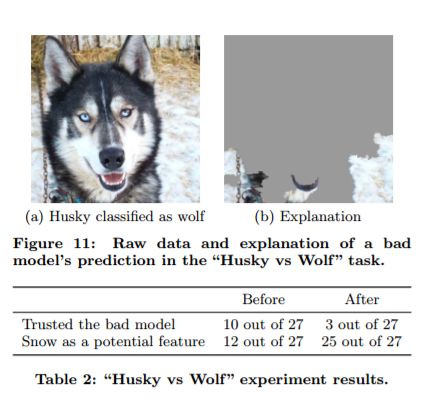

One final thing I'll mention is that in these networks, ReLU (rectified linear unit) is common activation for neurons, whereas previously we used sigmoid. This is a little more computationally nice for computers and it's versatile because it doesn't just go from zero to one it's got a wider range of possible outputs. That is typically used within the hidden layers and the final output layer typically uses softmax activation, which is pretty popular these days with transformers / LLMs, so I advise you to look into that if curious.

I sincerely hope this is enough information to understand the architecture, here's a full diagram that you should hopefully understand each part of now:

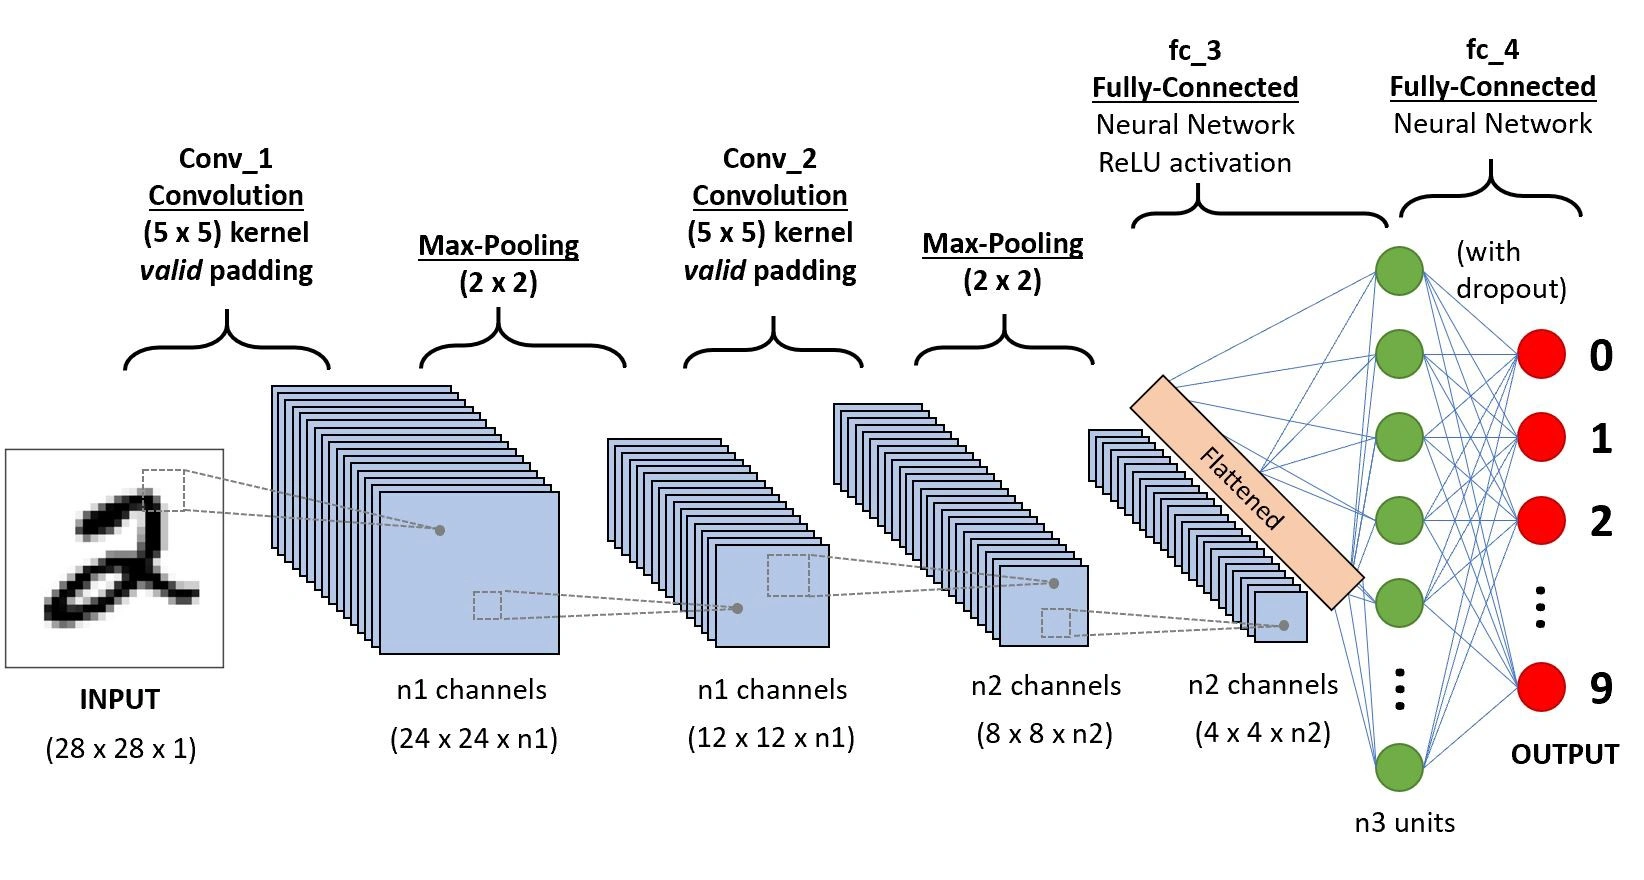

In [ ]:
# Some pseudo code for CNNs example:

# INITIALIZE NETWORK
for each conv layer:
    kernels[layer] = random_small_values(num_filters, kernel_size, kernel_size, input_channels)
    biases[layer] = zeros(num_filters)

for each fully_connected layer:
    weights[layer] = random_small_values(output_size, input_size)
    biases[layer] = zeros(output_size)

# TRAINING LOOP
for each epoch:
    for each batch of images:

        # ===== FORWARD PASS =====
        activation = input_image

        for each conv layer:
            # Slide each kernel across the image
            for each filter:
                feature_map[filter] = convolve(activation, kernels[filter]) + bias[filter]

            activation = ReLU(feature_map)
            activation = MaxPool(activation)  # take max in each 2x2 region

            save activation for backprop

        activation = flatten(activation)  # convert 3D to 1D

        for each fully_connected layer:
            activation = weights @ activation + bias
            activation = ReLU(activation)  # (or softmax on final layer)

            save activation for backprop

        predictions = activation
        loss = cross_entropy(predictions, true_labels)

        # ===== BACKWARD PASS =====
        gradient = derivative_of_loss(predictions, true_labels)

        for each fully_connected layer (in reverse):
            grad_weights = outer_product(gradient, saved_activation_from_forward)
            grad_bias = gradient
            gradient = weights.T @ gradient  # pass gradient to previous layer

            store grad_weights, grad_bias for update

        gradient = unflatten(gradient)  # convert 1D back to 3D

        for each conv layer (in reverse):
            gradient = reverse_MaxPool(gradient, saved_max_positions)
            gradient = ReLU_derivative(gradient)

            for each filter:
                # Gradient w.r.t. kernel weights
                for each position where kernel was applied:
                    grad_kernel += gradient[position] * saved_input_patch[position]

                grad_bias = sum(gradient)

                # Gradient w.r.t. input (for previous layer)
                for each position:
                    grad_input[position] += gradient[position] * kernel

            gradient = grad_input
            store grad_kernel, grad_bias for update

        # ===== UPDATE WEIGHTS =====
        for each parameter (kernels, weights, biases):
            parameter -= learning_rate * gradient_of_parameter

# Parallelism

This is where my interests really lie (my specialization is computer architecture). It's not hard to see that the operations being performed can probably be done at the exact same time.

As we sweep our kernel across the input image, there is a lot of room for parallelism, since we're just reading the data from the image and multiplying it with the data from the kernel. Instead of sequentially sweeping the kernel across the image, we can just do it all at the same time in different threads for each operation if that makes sense (this is where GPUs really stand out, and thanks to CUDA, programs like this can be written specifically to execute on NVIDIA GPUs).

Training the network on different images is also something that could be done in parallel, if we are doing batch gradient descent, which involves running a handful of images in a batch for training but not updating any gradients until after the batch is completed, this saves iterations of backpropagation, at the trade off of potentially slower learning (at least what I've seen in my own experiments / homework problems).

There is a bottleneck between different layers, since layer one must send it convolution over to layer two. However from an architecture standpoint, this is a simple pipelining problem but I don't want to discuss all of that here. Just know that it's possible to basically Daisy chain and pipeline the output from the first layer into the second layer so we can really get some super crazy parallelism there.

Once parallelism was fully exploited, it was really easy and fast to do really large networks with really large inputs so that's kind of one of the big reasons this took off and because it's very useful as you might've seen. I can drop a photo of a stop sign into Google images and it knows that it's a stop sign without any human having to tell it is a stop sign.

-----------------------